In [2]:
import pyemu,os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read in the PEST control file and residuals

In [26]:
inpstfile = os.path.join('..','9_Pilot_Points','reg7base','chip_pp_reg7.pst')
outpstfile = os.path.join('..','9_Pilot_Points','data','chip_pp_reg9.pst')

In [4]:
inpst = pyemu.Pst(inpstfile)

In [5]:
drop_wells = [i.strip().lower() for i in open(os.path.join('..','9_Pilot_Points','reg7','drops.txt'),'r').readlines()]

### Read in new weights

In [13]:
new_head_weights=pd.read_csv('head_weights.csv', header=None, index_col=0)

### Check out the current arrangement of components

In [7]:
inpst.phi

815414.30920357152

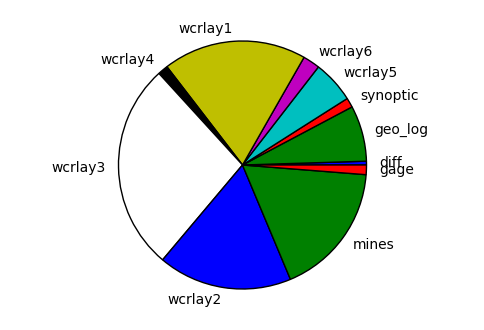

In [8]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

### Read in DEM range values for the observations

In [9]:
indflocation = os.path.join('..','3_PEST','setup')
WCRdf = pd.read_csv(os.path.join(indflocation,'WCR_DF_export.csv'))
WCRdf.index = [i.lower() for i in WCRdf.WUWN]
WCRdf = WCRdf[['dem_range']]
WCRdf.head(1)

,dem_range
nr570,3.183594


## Now zero-weight values with bad DEM range over `cthresh`

In [16]:
cthresh = 10
for cn in WCRdf.index:
    cv = WCRdf.loc[cn].values[0]
    if cv > cthresh:
        inpst.observation_data.set_value(cn,'weight',0)
    if cn in new_head_weights.index:
        inpst.observation_data.set_value(cn,'weight',new_head_weights.loc[cn])


In [17]:
inpst.observation_data.set_value('csc-b5','weight',0)
inpst.observation_data.set_value('sss-cul-hc','weight',0)
[inpst.observation_data.set_value(i,'weight',0) for i in drop_wells]
inpst.observation_data.loc['cx593']

obsnme      cx593
obsval    974.813
weight          0
obgnme    wcrlay6
Name: cx593, dtype: object

In [18]:
inpst.phi

260506.53187255649

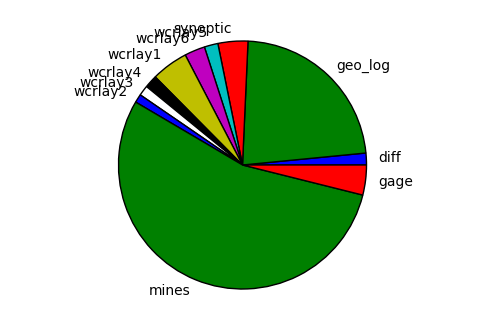

In [19]:
starting_components = inpst.phi_components_normalized
plt.axis('equal')
plt.pie([float(v) for v in starting_components.values()], labels=[k for k in starting_components.keys()]);

In [20]:
groups = ['diff', 'gage', 'geo_log', 'mines', 'synoptic', 'wcrlay1', 'wcrlay2', 'wcrlay3', 'wcrlay4', 'wcrlay5', 'wcrlay6']
groups

['diff',
 'gage',
 'geo_log',
 'mines',
 'synoptic',
 'wcrlay1',
 'wcrlay2',
 'wcrlay3',
 'wcrlay4',
 'wcrlay5',
 'wcrlay6']

In [21]:
new_portions = [0.04, 0.2, 0.1, 0.1, 0.25, .06, .04, .06, 0.07, 0.04, 0.04]
sum(new_portions)

1.0000000000000002

In [22]:
newcomponents = dict(zip(groups,[i*inpst.phi for i in new_portions]))

In [23]:
sum(newcomponents.values())

260506.53187255652

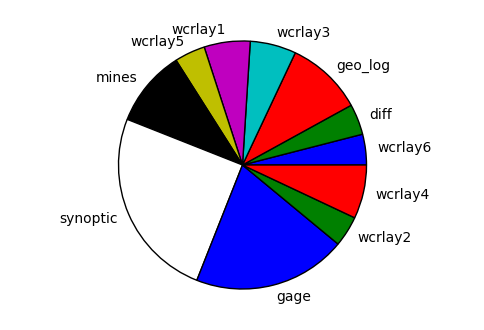

In [24]:
plt.axis('equal')
plt.pie([float(v) for v in newcomponents.values()], labels=[k for k in newcomponents.keys()]);

In [25]:
outpst=pyemu.Pst(inpstfile)



In [18]:
newcomponents

{'diff': 18505.377186405709,
 'gage': 92526.885932028556,
 'geo_log': 46263.442966014278,
 'mines': 46263.442966014278,
 'synoptic': 115658.60741503569,
 'wcrlay1': 27758.065779608565,
 'wcrlay2': 18505.377186405709,
 'wcrlay3': 27758.065779608565,
 'wcrlay4': 32384.410076209995,
 'wcrlay5': 18505.377186405709,
 'wcrlay6': 18505.377186405709}

In [19]:
outpst.phi_components

{'diff': 4022.2801024222204,
 'gage': 10157.042423152014,
 'geo_log': 59254.577966349949,
 'mines': 142158.02094246776,
 'synoptic': 10157.287205861232,
 'wcrlay1': 152476.8466002752,
 'wcrlay2': 142366.36976458202,
 'wcrlay3': 220857.24956594262,
 'wcrlay4': 10929.980637560682,
 'wcrlay5': 44915.929347180572,
 'wcrlay6': 18118.724647777275}

In [20]:
outpst.adjust_weights(obsgrp_dict=newcomponents)
outpst.phi_components


{'diff': 18505.377186405713,
 'gage': 92526.885932028541,
 'geo_log': 46263.44296601427,
 'mines': 46263.44296601427,
 'synoptic': 115658.60741503572,
 'wcrlay1': 27758.065779608565,
 'wcrlay2': 18505.377186405713,
 'wcrlay3': 27758.065779608565,
 'wcrlay4': 32384.410076209992,
 'wcrlay5': 18505.377186405705,
 'wcrlay6': 18505.377186405705}

In [27]:
outpst.parameter_data.set_value('hk_33', 'parubnd', 4.0)
outpst.parameter_data.set_value('hk_44', 'parubnd', 30.0)
outpst.parameter_data.set_value('hk_44', 'parlbnd', 4.0)
outpst.parameter_data.set_value('hk_66', 'parubnd', 30.0)
outpst.parameter_data.set_value('hk_66', 'parlbnd', 1.0)

[outpst.parameter_data.set_value(i, 'parlbnd', 1.0) for i in outpst.parameter_data.parnme if 'hkp6_' in i ]
[outpst.parameter_data.set_value(i, 'parlbnd', 4.0) for i in outpst.parameter_data.parnme if 'hkp4_' in i ]
[outpst.parameter_data.set_value(i, 'parubnd', 30.0) for i in outpst.parameter_data.parnme if 'hkp4_' in i ]
[outpst.parameter_data.set_value(i, 'parubnd', 30.0) for i in outpst.parameter_data.parnme if 'hkp6_' in i ]

outpst.observation_data.set_value('csc-b5','weight',0)
outpst.observation_data.set_value('sss-cul-hc','weight',0)
[outpst.observation_data.set_value(i,'weight',0) for i in drop_wells];

cthresh = 10
for cn in WCRdf.index:
    cv = WCRdf.loc[cn].values[0]
    if cv > cthresh:
        outpst.observation_data.set_value(cn,'weight',0)
    if cn in new_head_weights.index:
        outpst.observation_data.set_value(cn,'weight',new_head_weights.loc[cn])


In [28]:
outpst.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
parnme,,,,,,,,,,
hk_2,hk_2,log,factor,5.000000,2.000,20.0,hk,1.0,0.0,1
vk_2,vk_2,log,factor,0.304882,0.100,2.0,vk,1.0,0.0,1
hk_33,hk_33,log,factor,4.000000,0.100,4.0,hk,1.0,0.0,1
vk_33,vk_33,log,factor,0.005000,0.001,0.5,vk,1.0,0.0,1
hk_44,hk_44,log,factor,20.000000,4.000,30.0,hk,1.0,0.0,1
vk_44,vk_44,log,factor,0.500000,0.010,2.0,vk,1.0,0.0,1
hk_55,hk_55,log,factor,0.798598,0.100,4.0,hk,1.0,0.0,1
vk_55,vk_55,log,factor,0.002302,0.001,0.5,vk,1.0,0.0,1
hk_66,hk_66,log,factor,5.000000,1.000,30.0,hk,1.0,0.0,1


In [30]:
outpst.regul_lines[0] = '   3.0e+4  3.05e+4    0.1\n'

In [31]:
outpst.write(outpstfile)

In [32]:
outpst.parameter_data.loc['rmult_______'].parval1

1.0465281